<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data School</h1><h2>Data Exploration</h2><h3>Data Aggregation</h3></th>
        <th style="text-align:center; width:25%">
        <div class="alert alert-block alert-info", style='background:black' ><img src='https://dataschool.sg/static/media/data-school.66a3470f.png' style="width: 250px; height: 125px; "></div></th>
    </tr>
</table>





<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><div class="alert alert-block alert-info", style='background:gray' ><img src='https://www.sginnovate.com/sites/default/files/brand-logo.png' style="width: 250px; height: 125px; "></div></th>
        <th style="text-align:center;"><h1></h1><h2>With our esteemed partners</h2><h3></h3></th>
        <th style="text-align:center; width:25%"><img src='http://1.bp.blogspot.com/_yhJCyboCJYc/THClIailuLI/AAAAAAAAAws/468ePgviUso/S250/Developer+Learning+Solutions.png' style="width: 250px; height: 125px; "></th>
    </tr>
</table>

# Data Aggregation

### Objectives
After completing this practical exercise, students should be able to:
1. [Ability to use groupby and map functions](#Import)
2. [Understand pivot table tools and functions](#Rename)
3. [Ability to perform simple column calculation with ease](#Manipulate)

##### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Import data from CSV File from data sub folder accordingly

The datasets contains the Amazon Fires Comma Separated Values (CSV) files which needs to be read by the pandas read_csv() function.

In [2]:
# This is a famous dataset that is frequently used in data analysis and machine learning aspects
df = pd.read_csv("amazon_fires.csv", index_col=0)


In [3]:
df

ano       mes     estado   numero  encontro
0     1998   Janeiro       Acre  0 Fires  1/1/1998
1     1999   Janeiro       Acre  0 Fires  1/1/1999
2     2000   Janeiro       Acre  0 Fires  1/1/2000
3     2001   Janeiro       Acre  0 Fires  1/1/2001
4     2002   Janeiro       Acre  0 Fires  1/1/2002
...    ...       ...        ...      ...       ...
6449  2012  Dezembro  Tocantins      128  1/1/2012
6450  2013  Dezembro  Tocantins       85  1/1/2013
6451  2014  Dezembro  Tocantins      223  1/1/2014
6452  2015  Dezembro  Tocantins      373  1/1/2015
6453  2016  Dezembro  Tocantins      119  1/1/2016

[6454 rows x 5 columns]

In [4]:
new_columns = {'ano' : 'year',
               'estado': 'state',
               'mes': 'month',
               'numero': 'number_of_fires',
               'encontro': 'date'}

df.rename(columns = new_columns, inplace=True)
df['number_of_fires'] = df['number_of_fires'].str.strip(" Fires")
df['number_of_fires'] = df['number_of_fires'].fillna(0)
df['number_of_fires'] = df['number_of_fires'].astype(float)
df['state'] = df['state'].str.title()
# It is also good practice to create a copy of the original dataframe before modifying the dataframe for traceability
# The column number_of_fires is still a object or string datatype as the approach now is towards missing data values
df_copy = df.copy()
month_translations = {'Janeiro': 'January',
'Fevereiro': 'February',
'Março': 'March',
'Abril': 'April',
'Maio': 'May',
'Junho': 'June',
'Julho': 'July',
'Agosto': 'August',
'Setembro': 'September',
'Outubro': 'October',
'Novembro': 'November',
'Dezembro': 'December'}

df["month"] = df["month"].map(month_translations)

Print the first 5 rows using the pandas head() function.

In [5]:
df.head()

year    month state  number_of_fires      date
0  1998  January  Acre              0.0  1/1/1998
1  1999  January  Acre              0.0  1/1/1999
2  2000  January  Acre              0.0  1/1/2000
3  2001  January  Acre              0.0  1/1/2001
4  2002  January  Acre              0.0  1/1/2002

##### The Groupby tool

In [6]:
# The groupby tool actually segements the data into the respective groups in the variable values
state_groups = df.groupby('state')
state_groups.get_group('Rio')

year     month state  number_of_fires      date
4303  1998   January   Rio              0.0  1/1/1998
4304  1999   January   Rio              0.0  1/1/1999
4305  2000   January   Rio              0.0  1/1/2000
4306  2001   January   Rio              0.0  1/1/2001
4307  2002   January   Rio              0.0  1/1/2002
...    ...       ...   ...              ...       ...
5015  2012  December   Rio             38.0  1/1/2012
5016  2013  December   Rio             62.0  1/1/2013
5017  2014  December   Rio             31.0  1/1/2014
5018  2015  December   Rio             42.0  1/1/2015
5019  2016  December   Rio             79.0  1/1/2016

[717 rows x 5 columns]

In [7]:
# The size() can be applied to get a count of the number of items in each group
state_groups.size()

state
Acre                239
Alagoas             240
Amapa               239
Amazonas            239
Bahia               239
Ceara               239
Distrito Federal    239
Espirito Santo      239
Goias               239
Maranhao            239
Mato Grosso         478
Minas Gerais        239
Paraiba             478
Pará                239
Pernambuco          239
Piau                239
Rio                 717
Rondonia            239
Roraima             239
Santa Catarina      239
Sao Paulo           239
Sergipe             239
Tocantins           239
dtype: int64

In [8]:
# The way to calculate the average value by state as shown
df1 = df.groupby('state')['number_of_fires'].mean()
df1 = pd.DataFrame(df1)
df1["number_of_fires"].sort_values(ascending=False)



state
Sao Paulo           208.737230
Mato Grosso         199.930910
Bahia               181.639962
Piau                157.082222
Minas Gerais        154.821238
Espirito Santo      154.821238
Tocantins           139.922632
Ceara               127.175908
Amazonas            125.063301
Paraiba             108.209033
Maranhao            103.929577
Roraima              99.368510
Goias                97.752519
Santa Catarina       97.752519
Pernambuco           96.062762
Pará                 92.569640
Amapa                84.136301
Rondonia             80.499703
Acre                 75.192594
Rio                  62.482378
Alagoas              19.141667
Distrito Federal     14.648536
Sergipe              13.251046
Name: number_of_fires, dtype: float64

In [9]:
# The way to calculate the average value by state as shown
df.groupby('state')['number_of_fires'].mean()

state
Acre                 75.192594
Alagoas              19.141667
Amapa                84.136301
Amazonas            125.063301
Bahia               181.639962
Ceara               127.175908
Distrito Federal     14.648536
Espirito Santo      154.821238
Goias                97.752519
Maranhao            103.929577
Mato Grosso         199.930910
Minas Gerais        154.821238
Paraiba             108.209033
Pará                 92.569640
Pernambuco           96.062762
Piau                157.082222
Rio                  62.482378
Rondonia             80.499703
Roraima              99.368510
Santa Catarina       97.752519
Sao Paulo           208.737230
Sergipe              13.251046
Tocantins           139.922632
Name: number_of_fires, dtype: float64

In [10]:
df.groupby('state')['number_of_fires'].mean()




state
Acre                 75.192594
Alagoas              19.141667
Amapa                84.136301
Amazonas            125.063301
Bahia               181.639962
Ceara               127.175908
Distrito Federal     14.648536
Espirito Santo      154.821238
Goias                97.752519
Maranhao            103.929577
Mato Grosso         199.930910
Minas Gerais        154.821238
Paraiba             108.209033
Pará                 92.569640
Pernambuco           96.062762
Piau                157.082222
Rio                  62.482378
Rondonia             80.499703
Roraima              99.368510
Santa Catarina       97.752519
Sao Paulo           208.737230
Sergipe              13.251046
Tocantins           139.922632
Name: number_of_fires, dtype: float64

##### The same Pivot Table alternative

In [11]:
df.pivot_table(values='number_of_fires', index='state', aggfunc=np.mean)

number_of_fires
state                            
Acre                    75.192594
Alagoas                 19.141667
Amapa                   84.136301
Amazonas               125.063301
Bahia                  181.639962
Ceara                  127.175908
Distrito Federal        14.648536
Espirito Santo         154.821238
Goias                   97.752519
Maranhao               103.929577
Mato Grosso            199.930910
Minas Gerais           154.821238
Paraiba                108.209033
Pará                    92.569640
Pernambuco              96.062762
Piau                   157.082222
Rio                     62.482378
Rondonia                80.499703
Roraima                 99.368510
Santa Catarina          97.752519
Sao Paulo              208.737230
Sergipe                 13.251046
Tocantins              139.922632

In [12]:
# The added benefit is that when the margins is set to True, the cummulative average is also calculated for the variable values
df.pivot_table(values='number_of_fires', index='state', aggfunc=np.mean, margins=False)

number_of_fires
state                            
Acre                    75.192594
Alagoas                 19.141667
Amapa                   84.136301
Amazonas               125.063301
Bahia                  181.639962
Ceara                  127.175908
Distrito Federal        14.648536
Espirito Santo         154.821238
Goias                   97.752519
Maranhao               103.929577
Mato Grosso            199.930910
Minas Gerais           154.821238
Paraiba                108.209033
Pará                    92.569640
Pernambuco              96.062762
Piau                   157.082222
Rio                     62.482378
Rondonia                80.499703
Roraima                 99.368510
Santa Catarina          97.752519
Sao Paulo              208.737230
Sergipe                 13.251046
Tocantins              139.922632

In [13]:
# The added benefit is that when the margins is set to True, the cummulative average is also calculated for the variable values
df.pivot_table(values='number_of_fires', index='state', aggfunc=np.mean, margins=True)

number_of_fires
state                            
Acre                    75.192594
Alagoas                 19.141667
Amapa                   84.136301
Amazonas               125.063301
Bahia                  181.639962
Ceara                  127.175908
Distrito Federal        14.648536
Espirito Santo         154.821238
Goias                   97.752519
Maranhao               103.929577
Mato Grosso            199.930910
Minas Gerais           154.821238
Paraiba                108.209033
Pará                    92.569640
Pernambuco              96.062762
Piau                   157.082222
Rio                     62.482378
Rondonia                80.499703
Roraima                 99.368510
Santa Catarina          97.752519
Sao Paulo              208.737230
Sergipe                 13.251046
Tocantins              139.922632
All                    108.404542

<AxesSubplot:title={'center':'Brazil Fires by State'}, ylabel='state'>

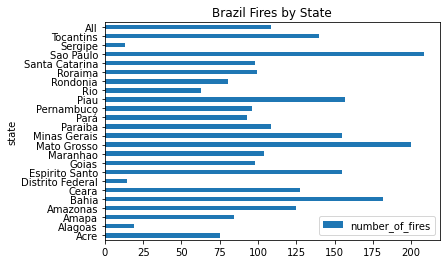

In [14]:
# This is useful when creating a plot
fires_per_state = df.pivot_table(values='number_of_fires', index='state', aggfunc=np.mean, margins=True)

# There is a need to extend the horizontal scale to the right just to make it more aesthetic for the variable values
max_val = fires_per_state["number_of_fires"].max() + 10

fires_per_state.plot(kind='barh', title='Brazil Fires by State', xlim=(0,max_val), legend=True)

In [15]:
# There is usefulness in leaving the categorical variables as text for data visiualization process

In [16]:
# The mean of the column values are not the same as the mean of the groupby state variable values
df["number_of_fires"].mean()

108.40454229934939

In [17]:
df

year     month      state  number_of_fires      date
0     1998   January       Acre              0.0  1/1/1998
1     1999   January       Acre              0.0  1/1/1999
2     2000   January       Acre              0.0  1/1/2000
3     2001   January       Acre              0.0  1/1/2001
4     2002   January       Acre              0.0  1/1/2002
...    ...       ...        ...              ...       ...
6449  2012  December  Tocantins            128.0  1/1/2012
6450  2013  December  Tocantins             85.0  1/1/2013
6451  2014  December  Tocantins            223.0  1/1/2014
6452  2015  December  Tocantins            373.0  1/1/2015
6453  2016  December  Tocantins            119.0  1/1/2016

[6454 rows x 5 columns]

In [18]:
# The mean values have to differ due to the difference in weights of the variable values
dfnew = df.groupby('state')['number_of_fires'].mean()
dfnew.mean()

108.44310554241707

##### Aggregate Multiple Column variable values

In [19]:
# Since there is only one numeric value, it would be good to create one more such as severity variable values
np.random.seed(28)
df['severity'] = np.random.randint(1, 5, df.shape[0])
df.head()

year    month state  number_of_fires      date  severity
0  1998  January  Acre              0.0  1/1/1998         2
1  1999  January  Acre              0.0  1/1/1999         2
2  2000  January  Acre              0.0  1/1/2000         2
3  2001  January  Acre              0.0  1/1/2001         3
4  2002  January  Acre              0.0  1/1/2002         1

In [20]:
df.pivot_table(values=['number_of_fires', 'severity'], index='state', aggfunc=np.mean, margins=True)

number_of_fires  severity
state                                      
Acre                    75.192594  2.364017
Alagoas                 19.141667  2.470833
Amapa                   84.136301  2.502092
Amazonas               125.063301  2.489540
Bahia                  181.639962  2.564854
Ceara                  127.175908  2.506276
Distrito Federal        14.648536  2.414226
Espirito Santo         154.821238  2.644351
Goias                   97.752519  2.430962
Maranhao               103.929577  2.476987
Mato Grosso            199.930910  2.491632
Minas Gerais           154.821238  2.552301
Paraiba                108.209033  2.433054
Pará                    92.569640  2.543933
Pernambuco              96.062762  2.464435
Piau                   157.082222  2.405858
Rio                     62.482378  2.520223
Rondonia                80.499703  2.518828
Roraima                 99.368510  2.439331
Santa Catarina          97.752519  2.510460
Sao Paulo              208.737230  2.493724
Sergipe                 13.251046  2.523013
Tocantins              139.922632  2.531381
All                    108.404542  2.491013

In [21]:
#--------------Apply multiple agg functions------------------
df.pivot_table(values=['number_of_fires', 'severity'], index='state', aggfunc=[np.mean, np.max, np.min], margins=True)
#------------------------------------------------------------


mean                      amax           \
                 number_of_fires  severity number_of_fires severity   
state                                                                 
Acre                   75.192594  2.364017           960.0        4   
Alagoas                19.141667  2.470833           162.0        4   
Amapa                  84.136301  2.502092           969.0        4   
Amazonas              125.063301  2.489540           998.0        4   
Bahia                 181.639962  2.564854           995.0        4   
Ceara                 127.175908  2.506276           995.0        4   
Distrito Federal       14.648536  2.414226           196.0        4   
Espirito Santo        154.821238  2.644351           959.0        4   
Goias                  97.752519  2.430962           759.0        4   
Maranhao              103.929577  2.476987           972.0        4   
Mato Grosso           199.930910  2.491632           979.0        4   
Minas Gerais          154.821238  2.552301           959.0        4   
Paraiba               108.209033  2.433054           987.0        4   
Pará                   92.569640  2.543933           971.0        4   
Pernambuco             96.062762  2.464435           859.0        4   
Piau                  157.082222  2.405858           943.0        4   
Rio                    62.482378  2.520223           885.0        4   
Rondonia               80.499703  2.518828           969.0        4   
Roraima                99.368510  2.439331           820.0        4   
Santa Catarina         97.752519  2.510460           759.0        4   
Sao Paulo             208.737230  2.493724           981.0        4   
Sergipe                13.251046  2.523013           198.0        4   
Tocantins             139.922632  2.531381           989.0        4   
All                   108.404542  2.491013           998.0        4   

                            amin           
                 number_of_fires severity  
state                                      
Acre                         0.0        1  
Alagoas                      0.0        1  
Amapa                        0.0        1  
Amazonas                     0.0        1  
Bahia                        0.0        1  
Ceara                        0.0        1  
Distrito Federal             0.0        1  
Espirito Santo               0.0        1  
Goias                        0.0        1  
Maranhao                     0.0        1  
Mato Grosso                  0.0        1  
Minas Gerais                 0.0        1  
Paraiba                      0.0        1  
Pará                         0.0        1  
Pernambuco                   0.0        1  
Piau                         0.0        1  
Rio                          0.0        1  
Rondonia                     0.0        1  
Roraima                      0.0        1  
Santa Catarina               0.0        1  
Sao Paulo                    0.0        1  
Sergipe                      0.0        1  
Tocantins                    0.0        1  
All                          0.0        1